# Pneumonia Balanced Databunches

Includes support for balanced classes and and subsetted training set size.  Default is 100 entries, use scale for grow/shrink size.

Databunches:
- get_db_vb() - returns 2 classes: NORMAL vs PNEUMONIA
- get_db_vb() - returns 2 classes: viral vs bacterial
- get_db_nvb() - returns 3 classes: normal, viral, bacterial

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import collections
import pickle

In [3]:
from fastai.vision import *
from fastai.callbacks import SaveModelCallback
from fastai.metrics import error_rate
import os
import pandas as pd 

In [4]:
from pneumonia_loaders import show_categories
#from pneumonia_loaders import get_labels, get_labellist, filter_files
from pneumonia_new_loader import get_xray_databunch, get_labels, filter_files

# Config

In [5]:
model = models.resnet18
prefix = 'other_classifier2_'
size=500
bs = 64

In [6]:
path = Path()/'data'/'chest_xray'
path.ls()

[WindowsPath('data/chest_xray/data'),
 WindowsPath('data/chest_xray/test'),
 WindowsPath('data/chest_xray/train'),
 WindowsPath('data/chest_xray/val')]

# Code

# Analysis

In [7]:
db = get_xray_databunch(path, label_func=None, scale=1, size=224)
db

ImageDataBunch;

Train: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,PNEUMONIA,PNEUMONIA,NORMAL,NORMAL
Path: data\chest_xray;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,PNEUMONIA,NORMAL,NORMAL,NORMAL
Path: data\chest_xray;

Test: None

In [8]:
print('Training set:')
show_categories(db.train_ds.y)
print('\nValidation set:')
show_categories(db.valid_ds.y)

Training set:
  NORMAL    :   100     50.0%
  PNEUMONIA :   100     50.0%
  Total     :   200

Validation set:
  NORMAL    :   100     50.0%
  PNEUMONIA :   100     50.0%
  Total     :   200


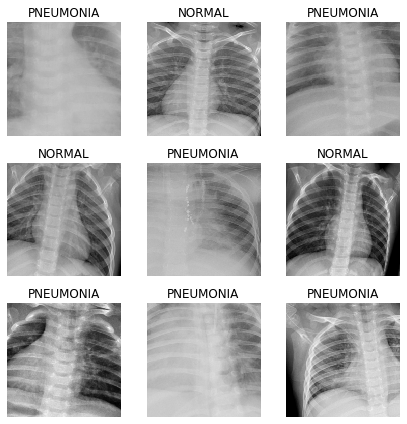

In [9]:
db.show_batch(3, figsize=(6,6))

In [10]:
db = get_xray_databunch(path, label_func=get_labels, scale=2, size=448)
db

ImageDataBunch;

Train: LabelList (600 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
virus,virus,virus,virus,bacteria
Path: data\chest_xray;

Valid: LabelList (222 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
bacteria,bacteria,virus,normal,bacteria
Path: data\chest_xray;

Test: None

In [11]:
print('Training set:')
show_categories(db.train_ds.y)
print('\nValidation set:')
show_categories(db.valid_ds.y)

Training set:
  bacteria  :   200     33.3%
  normal    :   200     33.3%
  virus     :   200     33.3%
  Total     :   600

Validation set:
  bacteria  :    74     33.3%
  normal    :    74     33.3%
  virus     :    74     33.3%
  Total     :   222


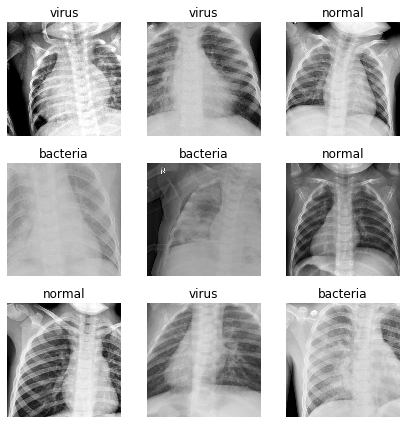

In [12]:
db.show_batch(3, figsize=(6,6))

In [13]:
db = get_xray_databunch(path, label_func=get_labels, scale=1, size=448, filter_func=filter_files, n_samples=150)
print(db.c, db.classes)
db

2 ['bacteria', 'virus']


ImageDataBunch;

Train: LabelList (300 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
virus,bacteria,bacteria,bacteria,bacteria
Path: data\chest_xray;

Valid: LabelList (148 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
virus,virus,bacteria,virus,bacteria
Path: data\chest_xray;

Test: None

In [14]:
print('Training set:')
show_categories(db.train_ds.y)
print('\nValidation set:')
show_categories(db.valid_ds.y)

Training set:
  bacteria  :   150     50.0%
  virus     :   150     50.0%
  Total     :   300

Validation set:
  bacteria  :    74     50.0%
  virus     :    74     50.0%
  Total     :   148


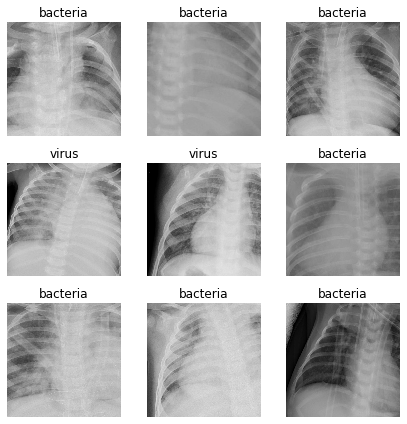

In [15]:
db.show_batch(3, figsize=(6,6))

# Older Version

In [16]:
from pneumonia_loaders import *

### Get Unfiltered Counts

In [17]:
print(characterize_labellist(path/'train'))
print(characterize_labellist(path/'val'))
print(characterize_labellist(path/'test'))
print('')
print(characterize_labellist(path/'train', filter_func=filter_files))
print(characterize_labellist(path/'val', filter_func=filter_files))
print(characterize_labellist(path/'test', filter_func=filter_files))
print('')
print(characterize_labellist(path/'train', label_func=get_labels))
print(characterize_labellist(path/'val', label_func=get_labels))
print(characterize_labellist(path/'test', label_func=get_labels))
print('')
print(characterize_labellist(path/'train', label_func=get_labels, filter_func=filter_files))
print(characterize_labellist(path/'val', label_func=get_labels, filter_func=filter_files))
print(characterize_labellist(path/'test', label_func=get_labels, filter_func=filter_files))

{'NORMAL': 1341, 'PNEUMONIA': 3875, '_total': 5216}
{'NORMAL': 8, 'PNEUMONIA': 8, '_total': 16}
{'NORMAL': 234, 'PNEUMONIA': 390, '_total': 624}

{'PNEUMONIA': 3875, '_total': 3875}
{'PNEUMONIA': 8, '_total': 8}
{'PNEUMONIA': 390, '_total': 390}

{'normal': 1341, 'bacteria': 2530, 'virus': 1345, '_total': 5216}
{'normal': 8, 'bacteria': 8, '_total': 16}
{'normal': 234, 'bacteria': 242, 'virus': 148, '_total': 624}

{'bacteria': 2530, 'virus': 1345, '_total': 3875}
{'bacteria': 8, '_total': 8}
{'bacteria': 242, 'virus': 148, '_total': 390}


### Get Sampled Counts

In [18]:
148/234

0.6324786324786325

In [19]:
sample_pneumonia = partial(sample_files, probs={'NORMAL':1.0, 'PNEUMONIA':0.346}, default_prob=0)
sample_pneumonia_v = partial(sample_files, probs={'NORMAL':1.0, 'PNEUMONIA':1.0}, default_prob=0)
sample_pneumonia_t = partial(sample_files, probs={'NORMAL':1.0, 'PNEUMONIA':0.6}, default_prob=0)

sample_vb = partial(sample_files, probs={'bacteria':0.5316, 'virus':1.0}, default_prob=1.0)
sample_vb_v = partial(sample_files, probs={'bacteria':1.0, 'virus':1.0}, default_prob=1.0)
sample_vb_t = partial(sample_files, probs={'bacteria':0.6115, 'virus':1.0}, default_prob=0.6325)

In [20]:
print(characterize_labellist(path/'train', sample_func=sample_pneumonia))
print(characterize_labellist(path/'val', sample_func=sample_pneumonia_v))
print(characterize_labellist(path/'test', sample_func=sample_pneumonia_t))
print('')
print(characterize_labellist(path/'train', filter_func=filter_files, sample_func=sample_pneumonia))
print(characterize_labellist(path/'val', filter_func=filter_files, sample_func=sample_pneumonia_v))
print(characterize_labellist(path/'test', filter_func=filter_files, sample_func=sample_pneumonia_t))
print('')
print(characterize_labellist(path/'train', label_func=get_labels, sample_func=sample_vb))
print(characterize_labellist(path/'val', label_func=get_labels, sample_func=sample_vb_v))
print(characterize_labellist(path/'test', label_func=get_labels, sample_func=sample_vb_t))
print('')
print(characterize_labellist(path/'train', label_func=get_labels, filter_func=filter_files, sample_func=sample_vb))
print(characterize_labellist(path/'val', label_func=get_labels, filter_func=filter_files, sample_func=sample_vb_v))
print(characterize_labellist(path/'test', label_func=get_labels, filter_func=filter_files, sample_func=sample_vb_t))

{'NORMAL': 1341, 'PNEUMONIA': 1305, '_total': 2646}
{'NORMAL': 8, 'PNEUMONIA': 8, '_total': 16}
{'NORMAL': 234, 'PNEUMONIA': 242, '_total': 476}

{'PNEUMONIA': 1335, '_total': 1335}
{'PNEUMONIA': 8, '_total': 8}
{'PNEUMONIA': 218, '_total': 218}

{'normal': 1341, 'bacteria': 1386, 'virus': 1345, '_total': 4072}
{'normal': 8, 'bacteria': 8, '_total': 16}
{'normal': 142, 'bacteria': 140, 'virus': 148, '_total': 430}

{'bacteria': 1325, 'virus': 1345, '_total': 2670}
{'bacteria': 8, '_total': 8}
{'bacteria': 150, 'virus': 148, '_total': 298}


### Reduce size

In [21]:
100/302

0.33112582781456956

In [22]:
print(characterize_labellist(path/'train', sample_func=sample_pneumonia, p_sample=0.0373))
print(characterize_labellist(path/'val', sample_func=sample_pneumonia_v))
print(characterize_labellist(path/'test', sample_func=sample_pneumonia_t, p_sample=0.216))
print('')
print(characterize_labellist(path/'train', label_func=get_labels, sample_func=sample_vb, p_sample=0.0249))
print(characterize_labellist(path/'val', label_func=get_labels, sample_func=sample_vb_v))
print(characterize_labellist(path/'test', label_func=get_labels, sample_func=sample_vb_t, p_sample=0.2273))
print('')
print(characterize_labellist(path/'train', label_func=get_labels, filter_func=filter_files, sample_func=sample_vb, p_sample=0.0376))
print(characterize_labellist(path/'val', label_func=get_labels, filter_func=filter_files, sample_func=sample_vb_v))
print(characterize_labellist(path/'test', label_func=get_labels, filter_func=filter_files, sample_func=sample_vb_t, p_sample=0.3311))

{'NORMAL': 49, 'PNEUMONIA': 28, '_total': 77}
{'NORMAL': 8, 'PNEUMONIA': 8, '_total': 16}
{'NORMAL': 44, 'PNEUMONIA': 52, '_total': 96}

{'normal': 25, 'virus': 36, 'bacteria': 37, '_total': 98}
{'normal': 8, 'bacteria': 8, '_total': 16}
{'normal': 29, 'bacteria': 37, 'virus': 34, '_total': 100}

{'virus': 44, 'bacteria': 36, '_total': 80}
{'bacteria': 8, '_total': 8}
{'bacteria': 37, 'virus': 44, '_total': 81}


### Verify Normal / Pneumonia

In [23]:
data = get_db_np(path, size=size)
data

ImageDataBunch;

Train: LabelList (96 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: data\chest_xray\train;

Valid: LabelList (111 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: data\chest_xray\test;

Test: None

In [24]:
print('Training set:')
show_categories(data.train_ds.y)
print('\nValidation set:')
show_categories(data.valid_ds.y)

Training set:
  NORMAL    :    51     53.1%
  PNEUMONIA :    45     46.9%
  Total     :    96

Validation set:
  NORMAL    :    54     48.6%
  PNEUMONIA :    57     51.4%
  Total     :   111


### Verify Viral / Bacterial

In [25]:
data = get_db_vb(path, size=size)
data

ImageDataBunch;

Train: LabelList (103 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
virus,virus,bacteria,virus,virus
Path: data\chest_xray\train;

Valid: LabelList (109 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
bacteria,bacteria,bacteria,bacteria,virus
Path: data\chest_xray\test;

Test: None

In [26]:
print('Training set:')
show_categories(data.train_ds.y)
print('\nValidation set:')
show_categories(data.valid_ds.y)

Training set:
  bacteria  :    49     47.6%
  virus     :    54     52.4%
  Total     :   103

Validation set:
  bacteria  :    48     44.0%
  virus     :    61     56.0%
  Total     :   109


### Verify Normal/Viral / Bacterial

In [27]:
data = get_db_nvb(path, size=size)
data

ImageDataBunch;

Train: LabelList (121 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
normal,normal,normal,normal,normal
Path: data\chest_xray\train;

Valid: LabelList (103 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
normal,normal,normal,normal,normal
Path: data\chest_xray\test;

Test: None

In [28]:
print('Training set:')
show_categories(data.train_ds.y)
print('\nValidation set:')
show_categories(data.valid_ds.y)

Training set:
  bacteria  :    45     37.2%
  normal    :    41     33.9%
  virus     :    35     28.9%
  Total     :   121

Validation set:
  bacteria  :    29     28.2%
  normal    :    43     41.7%
  virus     :    31     30.1%
  Total     :   103
